In [1]:
from apyori import apriori
from collections import Counter
from datetime import datetime
from itertools import combinations
import matplotlib.pyplot as plt
import pandas as pd
aisles = pd.read_csv("aisles.csv")
print("Aisles dtypes:\n",aisles.dtypes)
print("Aisles:\n")
print(aisles)

Aisles dtypes:
 aisle_id     int64
aisle       object
dtype: object
Aisles:

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


In [2]:
print("\naisles.isna().sum(axis=0)\n")
print(aisles.isna().sum(axis=0))


aisles.isna().sum(axis=0)

aisle_id    0
aisle       0
dtype: int64


In [3]:
departments = pd.read_csv("departments.csv")
print(departments.dtypes)

department_id     int64
department       object
dtype: object


In [4]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [5]:
departments.isna().sum(axis=0)

department_id    0
department       0
dtype: int64

In [6]:
products = pd.read_csv("products.csv")
print(products.dtypes)
products

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [7]:
print(aisles[aisles['aisle_id']==61],end='\n')
departments[departments['department_id']==19]

    aisle_id          aisle
60        61  cookies cakes


,department_id,department
18,19,snacks


In [8]:
products.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [9]:
orders = pd.read_csv("orders.csv")
print(orders.dtypes)
orders

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [10]:
print(orders.shape)
print(orders.eval_set.value_counts())
orders = orders[orders.eval_set == 'prior']
orders.drop('eval_set',axis=1,inplace=True)
orders.isna().sum(axis=0)

(3421083, 7)
prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


C:\Users\Saaket\AppData\Local\Temp\ipykernel_11948\3481167223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.drop('eval_set',axis=1,inplace=True)


order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [11]:
(orders.loc[orders.days_since_prior_order.isna()])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
11,2168274,2,1,2,11,NaN
26,1374495,3,1,1,14,NaN
39,3343014,4,1,6,11,NaN
45,2717275,5,1,3,12,NaN
...,...,...,...,...,...,...
3420930,969311,206205,1,4,12,NaN
3420934,3189322,206206,1,3,18,NaN
3421002,2166133,206207,1,6,19,NaN
3421019,2227043,206208,1,1,15,NaN


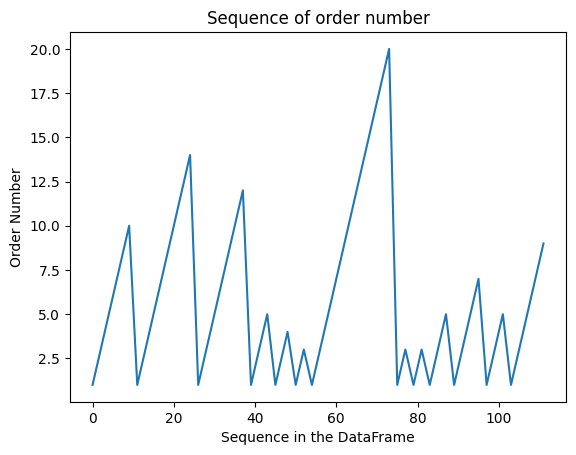

In [12]:
plt.plot(orders.order_number[:100])
plt.title('Sequence of order number')
plt.xlabel("Sequence in the DataFrame")
plt.ylabel("Order Number")
plt.show()

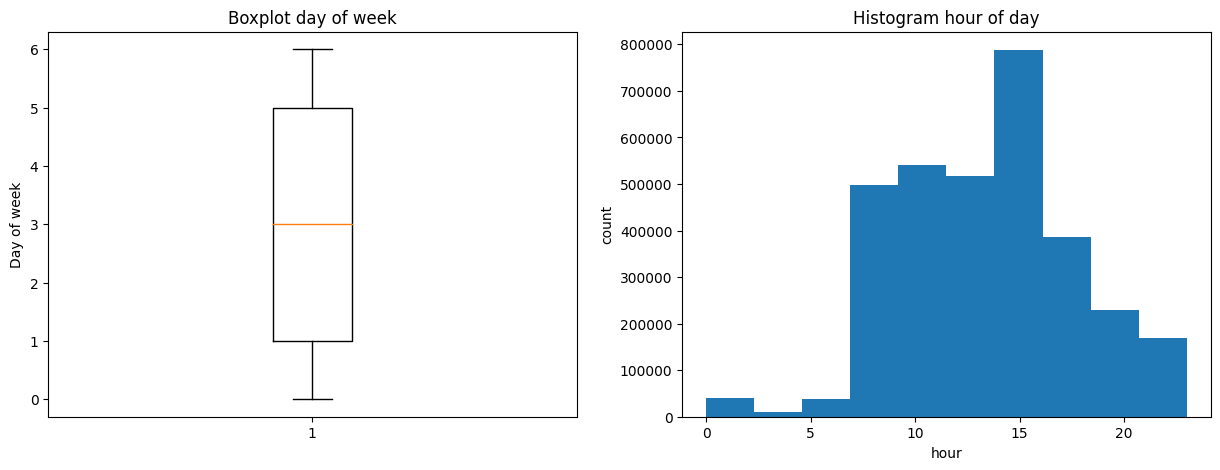

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].boxplot(orders.order_dow)
ax[0].set_title("Boxplot day of week")
ax[0].set_ylabel("Day of week")
ax[1].hist(orders.order_hour_of_day)
ax[1].set_title("Histogram hour of day")
ax[1].set_xlabel("hour")
ax[1].set_ylabel("count")
plt.show()

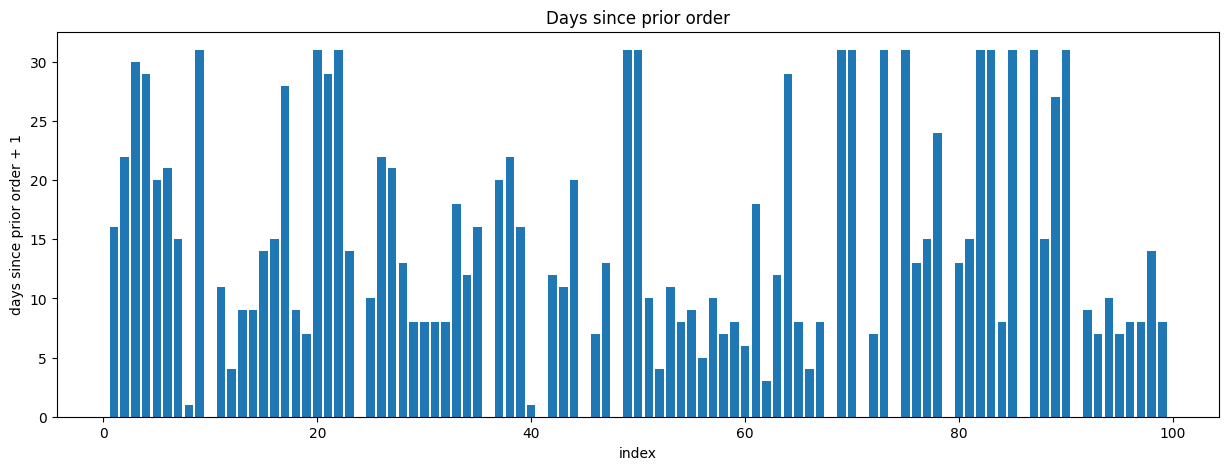

In [14]:
plt.figure(figsize = (15,5))
plt.bar(range(100),orders.days_since_prior_order[:100]+1)
plt.title('Days since prior order')
plt.xlabel('index')
plt.ylabel('days since prior order + 1')
plt.show()

In [15]:
order_products = pd.read_csv("order_products__prior.csv")
print(order_products.dtypes)
print(order_products.isna().sum(axis=0))
order_products

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [16]:
print(order_products.isna().sum(axis=0))
orders_apriori = orders.copy()
orders_user    = orders.groupby('user_id')['order_number'].max()
orders_user.head()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


user_id
1    10
2    14
3    12
4     5
5     4
Name: order_number, dtype: int64

In [17]:
products_user = orders[['order_id','user_id']].merge(order_products[['order_id','add_to_cart_order']].groupby('order_id').max().rename({
    'add_to_cart_order':'order_size'
},axis=1),on = 'order_id')
products_user

,order_id,user_id,order_size
0,2539329,1,5
1,2398795,1,6
2,473747,1,5
3,2254736,1,5
4,431534,1,8
...,...,...,...
3214869,2558525,206209,3
3214870,2266710,206209,9
3214871,1854736,206209,8
3214872,626363,206209,20


In [18]:
products_user[products_user.order_id==2]

,order_id,user_id,order_size
3153247,2,202279,9


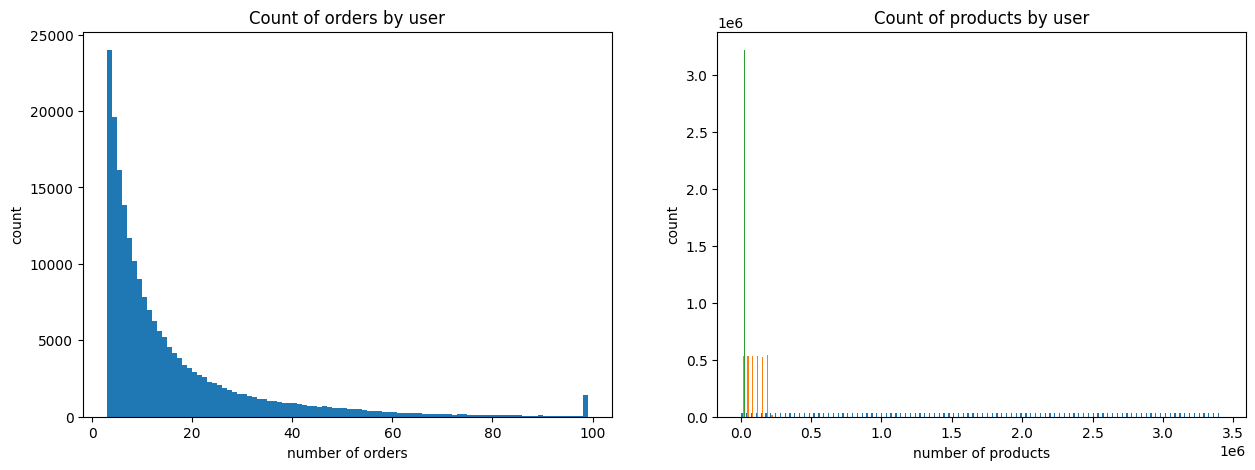

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(orders_user, bins= max(orders_user) - min(orders_user))
ax[0].set_title('Count of orders by user')
ax[0].set_xlabel('number of orders')
ax[0].set_ylabel('count')
ax[1].hist(products_user, bins=100)
ax[1].set_title('Count of products by user')
ax[1].set_xlabel('number of products')
ax[1].set_ylabel('count')
plt.show()

In [20]:
orders_apriori.drop(['user_id','order_id'],axis=1,inplace=True)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,2,8,NaN
1,2,3,7,15.0
2,3,3,12,21.0
3,4,4,7,29.0
4,5,4,15,28.0


In [21]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [22]:
def order_number_categorical(order_number):
    if order_number in range(3):
        return 'order_number_1-3'
    if order_number in range(3,5):
        return 'order_number_4-5'
    if order_number in range(5,10):
        return 'order_number_6-10'
    if order_number in range(10,20):
        return 'order_number_11-20'
    if order_number in range(20,40):
        return 'order_number_21-40'
    if order_number in range(40,60):
        return 'order_number_41-60'
    if order_number >= 60:
        return 'order_number_60+'

orders_apriori.order_number = orders_apriori.order_number.map(order_number_categorical)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,2,8,NaN
1,order_number_1-3,3,7,15.0
2,order_number_4-5,3,12,21.0
3,order_number_4-5,4,7,29.0
4,order_number_6-10,4,15,28.0


In [23]:
orders_by_dow = orders.order_dow.value_counts()
orders_by_dow

0    557772
1    556705
2    441955
5    425982
6    418848
3    412400
4    401212
Name: order_dow, dtype: int64

In [24]:
products_by_dow = orders[['order_id','order_dow']].merge(order_products[['order_id','add_to_cart_order']].groupby('order_id').max().rename({'add_to_cart_order':'order_size'},axis=1),on='order_id')
products_by_dow = products_by_dow.drop('order_id',axis=1).groupby('order_dow')['order_size'].sum()
products_by_dow

order_dow
0    6209666
1    5665856
2    4217798
3    3844117
4    3787215
5    4209533
6    4500304
Name: order_size, dtype: int64

In [25]:
def dow_categorical(dow):
    if dow in [0,1]:
        return 'weekend'
    else:
        return 'weekday'

orders_apriori.order_dow = orders_apriori.order_dow.map(dow_categorical)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,8,NaN
1,order_number_1-3,weekday,7,15.0
2,order_number_4-5,weekday,12,21.0
3,order_number_4-5,weekday,7,29.0
4,order_number_6-10,weekday,15,28.0


In [26]:
orders_by_hour = orders.order_hour_of_day.value_counts()
orders_by_hour

10    271885
11    268006
15    266132
14    265556
13    261174
12    256206
16    255949
9     243496
17    214080
18    170998
8     168321
19    131620
20     98109
7      86656
21     73436
22     57540
23     37613
6      28792
0      21372
1      11596
5       8972
2       7070
4       5175
3       5120
Name: order_hour_of_day, dtype: int64

In [27]:
#fig, ax = plt.subplots(1, 2, figsize=(15,5))
#ax[0].bar(orders_by_hour.index, orders_by_hour)
#ax[0].set_title('Number of orders by hour of day')
#ax[0].set_xlabel('hour of day')
#ax[0].set_ylabel('number of orders')
#ax[1].bar(products_by_hour.index,)

In [28]:
def hour_categorical(hour):
    if hour in range(7):
        return 'early_hours'
    if hour in range(7,10):
        return 'hour_'+str(hour)
    if hour in range(10,17):
        return 'peak_hours'
    if hour in range(17,24):
        return 'hour_'+str(hour)

orders_apriori.order_hour_of_day = orders_apriori.order_hour_of_day.map(hour_categorical)
orders_apriori.head()


,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,hour_8,NaN
1,order_number_1-3,weekday,hour_7,15.0
2,order_number_4-5,weekday,peak_hours,21.0
3,order_number_4-5,weekday,hour_7,29.0
4,order_number_6-10,weekday,peak_hours,28.0


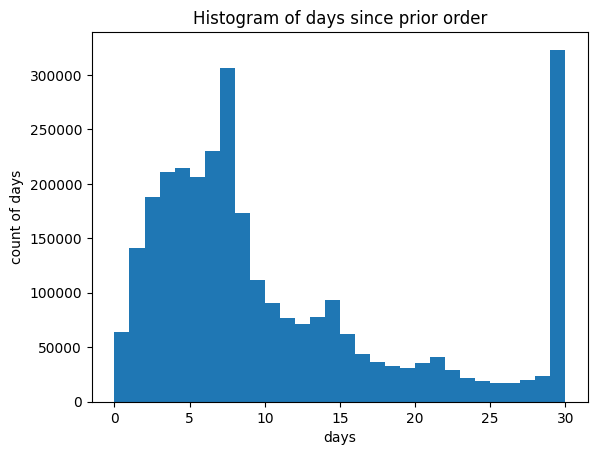

In [29]:
plt.hist(orders.days_since_prior_order,bins=30)
plt.title('Histogram of days since prior order')
plt.xlabel('days')
plt.ylabel('count of days')
plt.show()

In [30]:
import numpy as np
def interval_categorical(interval):
    if np.isnan(interval):
        return 'first_order'
    elif interval in [7, 14, 21]:
        return 'interval_weekly'
    elif interval == 30:
        return 'interval_30+'
    else:
        return 'interval_others'

orders_apriori.days_since_prior_order = orders_apriori.days_since_prior_order.map(interval_categorical)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,hour_8,first_order
1,order_number_1-3,weekday,hour_7,interval_others
2,order_number_4-5,weekday,peak_hours,interval_weekly
3,order_number_4-5,weekday,hour_7,interval_others
4,order_number_6-10,weekday,peak_hours,interval_others


In [31]:
products_id_to_name = {k: v for k, v in zip(products.product_id,products.product_name)}
products_id_to_name

{1: 'Chocolate Sandwich Cookies',
 2: 'All-Seasons Salt',
 3: 'Robust Golden Unsweetened Oolong Tea',
 4: 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce',
 5: 'Green Chile Anytime Sauce',
 6: 'Dry Nose Oil',
 7: 'Pure Coconut Water With Orange',
 8: "Cut Russet Potatoes Steam N' Mash",
 9: 'Light Strawberry Blueberry Yogurt',
 10: 'Sparkling Orange Juice & Prickly Pear Beverage',
 11: 'Peach Mango Juice',
 12: 'Chocolate Fudge Layer Cake',
 13: 'Saline Nasal Mist',
 14: 'Fresh Scent Dishwasher Cleaner',
 15: 'Overnight Diapers Size 6',
 16: 'Mint Chocolate Flavored Syrup',
 17: 'Rendered Duck Fat',
 18: 'Pizza for One Suprema  Frozen Pizza',
 19: 'Gluten Free Quinoa Three Cheese & Mushroom Blend',
 20: 'Pomegranate Cranberry & Aloe Vera Enrich Drink',
 21: 'Small & Medium Dental Dog Treats',
 22: 'Fresh Breath Oral Rinse Mild Mint',
 23: 'Organic Turkey Burgers',
 24: 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants',
 25: 'Salted Caramel Lean Protein & 

In [32]:
order_products_names = order_products.copy()
order_products_names['product_name'] = order_products_names.product_id.map(lambda x: products_id_to_name[x])
order_products_names

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1,1,Organic Egg Whites
1,2,28985,2,1,Michigan Organic Kale
2,2,9327,3,0,Garlic Powder
3,2,45918,4,1,Coconut Butter
4,2,30035,5,0,Natural Sweetener
...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter
32434486,3421083,4600,8,0,All Natural French Toast Sticks
32434487,3421083,24852,9,1,Banana


In [33]:
reorder_proportion = pd.crosstab(order_products_names.product_name, order_products_names.reordered)
reorder_proportion

reordered,0,1
product_name,,
#2 Coffee Filters,520,257
#2 Cone White Coffee Filters,10,3
#2 Mechanical Pencils,8,0
#4 Natural Brown Coffee Filters,152,89
& Go! Hazelnut Spread + Pretzel Sticks,77,87
...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,20,17
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,36,19
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,37,31


In [34]:
reorder_proportion.sort_values(by = 0, ascending = False)

reordered,0,1
product_name,,
Banana,73956,398609
Bag of Organic Bananas,63537,315913
Organic Strawberries,58838,205845
Organic Baby Spinach,55037,186884
Large Lemon,46402,106255
...,...,...
Brut Prosecco,1,0
Smooth & Silky Head and Shoulders Smooth & Silky 2-in-1 Dandruff Shampoo + Conditioner 13.5 Fl Oz Female Hair Care,1,0
Gluten Free Pantry Sugar Cookie Mix,1,1


In [35]:
reorder_proportion.sort_values(by = 1,ascending=False)

reordered,0,1
product_name,,
Banana,73956,398609
Bag of Organic Bananas,63537,315913
Organic Strawberries,58838,205845
Organic Baby Spinach,55037,186884
Organic Hass Avocado,43453,170131
...,...,...
Decorating Green Cake Icing,21,0
Lemon Ice Tea Liquid,4,0
"Decorating Gel, Red",7,0


In [36]:
reorder_proportion['total'] = reorder_proportion.sum(axis = 1)
reorder_proportion['0.perc']= reorder_proportion[0]/reorder_proportion['total']
reorder_proportion['1.perc']= reorder_proportion[1]/reorder_proportion['total']
reorder_proportion.head()

reordered,0,1,total,0.perc,1.perc
product_name,,,,,
#2 Coffee Filters,520,257,777,0.669241,0.330759
#2 Cone White Coffee Filters,10,3,13,0.769231,0.230769
#2 Mechanical Pencils,8,0,8,1.000000,0.000000
#4 Natural Brown Coffee Filters,152,89,241,0.630705,0.369295
& Go! Hazelnut Spread + Pretzel Sticks,77,87,164,0.469512,0.530488


In [37]:
reorder_proportion.sort_values(by = ['0.perc','total'],ascending=False)[['0.perc','total']]

reordered,0.perc,total
product_name,,
Vicks DayQuil and NyQuil Cold & Flu Relief Combo,1.000000,88
Organic Castor Oil Skin Care,1.000000,67
Organic Whole Rosemary,1.000000,63
Lemon Verbena Scent Glass Cleaner,1.000000,53
Organic Lemongrass,1.000000,52
...,...,...
Soy Powder Infant Formula,0.085714,35
Chocolate Love Bar,0.079208,101
Orange Energy Shots,0.076923,13


In [38]:
reorder_proportion.sort_values(by = ['1.perc','total'],ascending = False)[['1.perc','total']]

reordered,1.perc,total
product_name,,
Raw Veggie Wrappers,0.941176,68
Serenity Ultimate Extrema Overnight Pads,0.931034,87
Orange Energy Shots,0.923077,13
Chocolate Love Bar,0.920792,101
Soy Powder Infant Formula,0.914286,35
...,...,...
Vitality Chicken Breasts with Flaxseed & Vitamins Dog Treats,0.000000,1
Vitamin D Gummies,0.000000,1
Wicked Good No-Fry Wing Marinade,0.000000,1


In [39]:
reorder_proportion.total.sort_values(ascending=False)
products_bought = sorted(order_products.product_id.unique())
len(products_bought),len(products)

(49677, 49688)

In [40]:
products_not_bought=list(products.product_id[~products.product_id.isin(products_bought)])
[[products_id_to_name[product] for product in products_not_bought]]
products_not_registered = list(pd.Series(products_bought)[~pd.Series(products_bought).isin(products.product_id)])
len(products_not_registered), products_not_registered

(0, [])

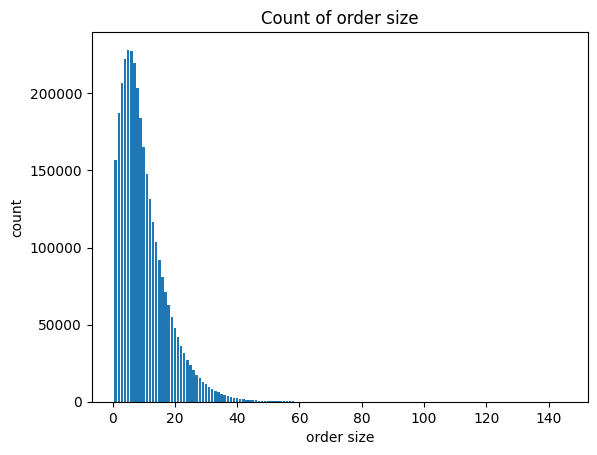

In [41]:
cart_size = order_products.groupby('order_id')['add_to_cart_order'].max()
cart_size = cart_size.value_counts()
plt.bar(cart_size.index,cart_size)
plt.title('Count of order size')
plt.xlabel('order size')
plt.ylabel('count')
plt.show()

In [42]:
add_to_cart = pd.crosstab(order_products_names.product_name,order_products_names.add_to_cart_order)
for i in range(1,6):
    print('ORDER = ',i)
    print(add_to_cart.sort_values(by = i,ascending=False)[i][:5])
    print('\n')

ORDER =  1
product_name
Banana                    110916
Bag of Organic Bananas     78988
Organic Whole Milk         30927
Organic Strawberries       27975
Organic Hass Avocado       24116
Name: 1, dtype: int64


ORDER =  2
product_name
Banana                    80432
Bag of Organic Bananas    64337
Organic Strawberries      29754
Organic Hass Avocado      26517
Organic Baby Spinach      25025
Name: 2, dtype: int64


ORDER =  3
product_name
Banana                    58577
Bag of Organic Bananas    48972
Organic Strawberries      27809
Organic Baby Spinach      24297
Organic Hass Avocado      24212
Name: 3, dtype: int64


ORDER =  4
product_name
Banana                    43653
Bag of Organic Bananas    36955
Organic Strawberries      25242
Organic Baby Spinach      22733
Organic Hass Avocado      21001
Name: 4, dtype: int64


ORDER =  5
product_name
Banana                    33647
Bag of Organic Bananas    28897
Organic Strawberries      22137
Organic Baby Spinach      20308
Organic Has

In [43]:
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,hour_8,first_order
1,order_number_1-3,weekday,hour_7,interval_others
2,order_number_4-5,weekday,peak_hours,interval_weekly
3,order_number_4-5,weekday,hour_7,interval_others
4,order_number_6-10,weekday,peak_hours,interval_others


In [43]:
trans = []
for i in range(orders_apriori.shape[0]):
    trans.append([str(orders_apriori.values[i, j]) for j in range(orders_apriori.shape[1])])

start = datetime.now()
rules = apriori(trans, min_support = 0.005, min_confidence = 0.2, min_lift = 2)
results= list(rules)
print('Execution Time: ',datetime.now() - start)

Execution Time:  0:02:43.043544


In [44]:
r = results[0][2]
A = []
B = []
support = []
confidence = []
lift = []
for result in results:
    s = result[1]
    result_rules = result[2]
    for result_rule in result_rules:
        a = list(result_rule[0])
        b = list(result_rule[1])
        c = result_rule[2]
        l = result_rule[3]
        A.append(a)
        B.append(b)
        support.append(s)
        confidence.append(c)
        lift.append(l)

rules_df = pd.DataFrame({
    'A':A,
    'B':B,
    'support':support,
    'confidence':confidence,
    'lift':lift
})

rules_df = rules_df.sort_values(by = "lift",ascending = False).reset_index(drop = True)
rules_df

,A,B,support,confidence,lift
0,"[peak_hours, first_order]","[order_number_1-3, weekend]",0.013600,0.367834,8.057873
1,"[order_number_1-3, weekend]","[peak_hours, first_order]",0.013600,0.297930,8.057873
2,"[weekend, first_order]","[order_number_1-3, peak_hours]",0.013600,0.594952,8.047623
3,"[order_number_1-3, weekend]",[first_order],0.022859,0.500763,7.807082
4,[first_order],"[order_number_1-3, weekend]",0.022859,0.356386,7.807082
5,[first_order],"[order_number_1-3, peak_hours, weekend]",0.013600,0.212032,7.799732
6,"[order_number_1-3, peak_hours, weekend]",[first_order],0.013600,0.500292,7.799732
7,"[order_number_1-3, peak_hours]",[first_order],0.036974,0.500126,7.797151
8,[first_order],"[order_number_1-3, peak_hours]",0.036974,0.576435,7.797151
9,[first_order],"[order_number_1-3, weekday, peak_hours]",0.023374,0.364402,7.795650


In [45]:
len(rules_df)

38

In [46]:
A[0],B[0],A[1],B[1]

(['first_order'], ['order_number_1-3'], ['order_number_1-3'], ['first_order'])

In [47]:
transactions_df = order_products[['order_id','product_id']][:5000]
transactions_df

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
4995,528,40897
4996,528,22182
4997,528,44799
4998,529,41844


In [48]:
transactions_df = order_products[['order_id','product_id']][:5000]
n_orders = len(set(transactions_df.order_id))
n_products= len(set(transactions_df.product_id))
n_orders, n_products

(499, 2809)

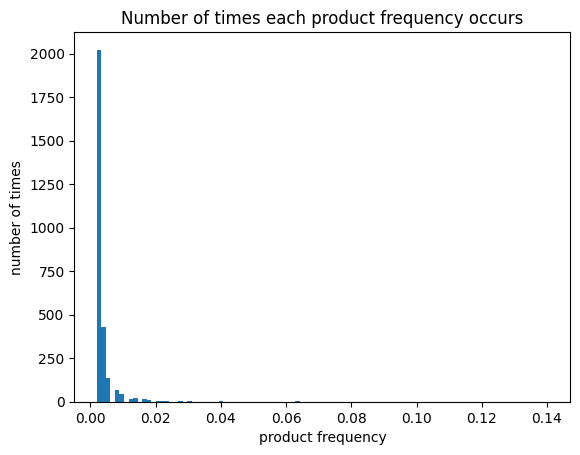

In [49]:
product_frequency = transactions_df.product_id.value_counts()/n_orders
plt.hist(product_frequency, bins=100)
plt.title('Number of times each product frequency occurs')
plt.xlabel('product frequency')
plt.ylabel('number of times')
plt.show()

In [50]:
min_support = 0.01
products_apriori = product_frequency[product_frequency>=min_support]
products_apriori

24852    0.140281
13176    0.120240
21903    0.078156
47209    0.064128
21137    0.064128
           ...   
35503    0.010020
12276    0.010020
19019    0.010020
44142    0.010020
47144    0.010020
Name: product_id, Length: 149, dtype: float64

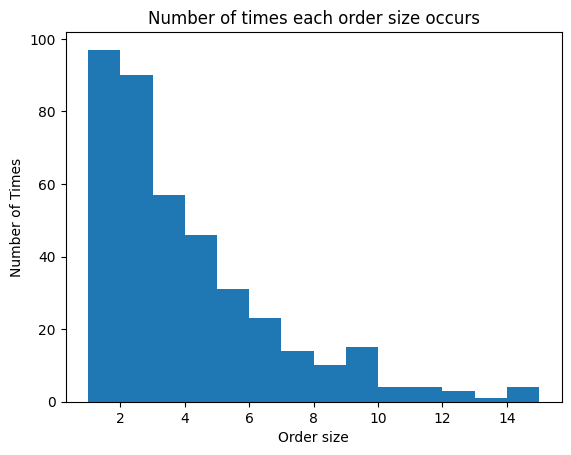

In [51]:
transactions_apriori = transactions_df[transactions_df.product_id.isin(products_apriori.index)]
order_sizes = transactions_apriori.order_id.value_counts()
plt.hist(order_sizes, bins = max(order_sizes) - min(order_sizes))
plt.title('Number of times each order size occurs')
plt.xlabel('Order size')
plt.ylabel('Number of Times')
plt.show()

In [52]:
min_length = 2
orders_apriori = order_sizes[order_sizes>=min_length]
transactions_apriori = transactions_apriori[transactions_apriori.order_id.isin(orders_apriori.index)]
transactions_by_order= transactions_apriori.groupby('order_id')['product_id']
for order_id, order_list in transactions_by_order:
    print("Order_id:\t",order_id,'\nOrder_list:\t',list(order_list))
    product_combinations = combinations(order_list, 2)
    print('Product combinations')
    print([i for i in product_combinations])
    print('\n')

Order_id:	 2 
Order_list:	 [33120, 28985, 17794]
Product combinations
[(33120, 28985), (33120, 17794), (28985, 17794)]


Order_id:	 3 
Order_list:	 [24838, 21903, 46667, 17461]
Product combinations
[(24838, 21903), (24838, 46667), (24838, 17461), (21903, 46667), (21903, 17461), (46667, 17461)]


Order_id:	 5 
Order_list:	 [13176, 27966, 23909, 6184, 37011, 47209]
Product combinations
[(13176, 27966), (13176, 23909), (13176, 6184), (13176, 37011), (13176, 47209), (27966, 23909), (27966, 6184), (27966, 37011), (27966, 47209), (23909, 6184), (23909, 37011), (23909, 47209), (6184, 37011), (6184, 47209), (37011, 47209)]


Order_id:	 9 
Order_list:	 [21405, 14992, 31506, 432]
Product combinations
[(21405, 14992), (21405, 31506), (21405, 432), (14992, 31506), (14992, 432), (31506, 432)]


Order_id:	 10 
Order_list:	 [24852, 31717, 47766, 4605, 21137, 27156, 14992, 49235]
Product combinations
[(24852, 31717), (24852, 47766), (24852, 4605), (24852, 21137), (24852, 27156), (24852, 14992), (24852

In [53]:
def product_combinations(transactions_df,max_length=5):
    transactions_by_order = transactions_df.groupby('order_id')['product_id']
    max_length_reference  = max_length
    for order_id, order_list in transactions_by_order:
        max_length = min(max_length_reference,len(order_list))
        order_list = sorted(order_list)
        for l in range(2, max_length+1):
            product_combinations = combinations(order_list, l)
            for combination in product_combinations:
                yield combination

combs = product_combinations(transactions_apriori)
for _ in range(100):
    print(next(iter(combs)))

(17794, 28985)
(17794, 33120)
(28985, 33120)
(17794, 28985, 33120)
(17461, 21903)
(17461, 24838)
(17461, 46667)
(21903, 24838)
(21903, 46667)
(24838, 46667)
(17461, 21903, 24838)
(17461, 21903, 46667)
(17461, 24838, 46667)
(21903, 24838, 46667)
(17461, 21903, 24838, 46667)
(6184, 13176)
(6184, 23909)
(6184, 27966)
(6184, 37011)
(6184, 47209)
(13176, 23909)
(13176, 27966)
(13176, 37011)
(13176, 47209)
(23909, 27966)
(23909, 37011)
(23909, 47209)
(27966, 37011)
(27966, 47209)
(37011, 47209)
(6184, 13176, 23909)
(6184, 13176, 27966)
(6184, 13176, 37011)
(6184, 13176, 47209)
(6184, 23909, 27966)
(6184, 23909, 37011)
(6184, 23909, 47209)
(6184, 27966, 37011)
(6184, 27966, 47209)
(6184, 37011, 47209)
(13176, 23909, 27966)
(13176, 23909, 37011)
(13176, 23909, 47209)
(13176, 27966, 37011)
(13176, 27966, 47209)
(13176, 37011, 47209)
(23909, 27966, 37011)
(23909, 27966, 47209)
(23909, 37011, 47209)
(27966, 37011, 47209)
(6184, 13176, 23909, 27966)
(6184, 13176, 23909, 37011)
(6184, 13176, 23909,

In [54]:
combs = product_combinations(transactions_apriori)
counter=Counter(combs).items()
combinations_count = pd.Series([x[1] for x in counter], index=[x[0] for x in counter])
combinations_frequency = combinations_count/n_orders
combinations_frequency

(17794, 28985)                  0.006012
(17794, 33120)                  0.002004
(28985, 33120)                  0.002004
(17794, 28985, 33120)           0.002004
(17461, 21903)                  0.004008
                                  ...   
(17461, 21903, 35939)           0.002004
(17461, 21903, 49235)           0.002004
(17461, 35939, 49235)           0.002004
(21903, 35939, 49235)           0.002004
(17461, 21903, 35939, 49235)    0.002004
Length: 41452, dtype: float64

In [55]:
combinations_apriori = combinations_frequency[combinations_frequency>=min_support]
combinations_apriori = combinations_apriori[combinations_apriori.index.map(len)>=min_length]
combinations_apriori

(13176, 27966)    0.018036
(13176, 47209)    0.018036
(27966, 47209)    0.012024
(21137, 24852)    0.014028
(21137, 47766)    0.012024
(24852, 47766)    0.012024
(21903, 24852)    0.028056
(13176, 17794)    0.010020
(13176, 43352)    0.010020
(21903, 22935)    0.010020
(16797, 39275)    0.012024
(16797, 43352)    0.010020
(24852, 49683)    0.012024
(24852, 47626)    0.014028
(37646, 47209)    0.012024
(21903, 47209)    0.012024
(21137, 21903)    0.010020
(21137, 47209)    0.010020
(13176, 22935)    0.014028
(24852, 28204)    0.016032
(24852, 45066)    0.016032
(1158, 21903)     0.010020
(9076, 24852)     0.014028
(16797, 24852)    0.010020
(13176, 21137)    0.014028
(24852, 26209)    0.014028
(12341, 16797)    0.010020
dtype: float64

In [56]:
len(combinations_apriori)

27

In [58]:
A,B,AB = [],[],[]
for c in combinations_apriori.index:
    c_length = len(c)
    for l in range(1, c_length):
        comb = combinations(c, l)
        for a in comb:
            AB.append(c)
            b = list(c)
            for e in a:
                b.remove(e)
            b = tuple(b)
            if len(a) == 1:
                a = a[0]
            A.append(a)
            if len(b) == 1:
                b = b[0]
            B.append(b)

apriori_df = pd.DataFrame({'A':A,'B':B,'AB':AB})
apriori_df.head()

,A,B,AB
0,13176,27966,"(13176, 27966)"
1,27966,13176,"(13176, 27966)"
2,13176,47209,"(13176, 47209)"
3,47209,13176,"(13176, 47209)"
4,27966,47209,"(27966, 47209)"


In [59]:
support = {**{k:v for k, v in products_apriori.items()},
           **{k:v for k, v in combinations_frequency.items()}}

apriori_df[['support_A','support_B','support_AB']] = apriori_df[["A","B","AB"]].applymap(lambda x: support[x])
apriori_df.drop("AB",axis=1,inplace=True)
apriori_df["confidence"] = apriori_df.support_AB/apriori_df.support_A
apriori_df["lift"] = apriori_df.confidence/apriori_df.support_B
apriori_df

,A,B,support_A,support_B,support_AB,confidence,lift
0,13176,27966,0.120240,0.040080,0.018036,0.150000,3.742500
1,27966,13176,0.040080,0.120240,0.018036,0.450000,3.742500
2,13176,47209,0.120240,0.064128,0.018036,0.150000,2.339063
3,47209,13176,0.064128,0.120240,0.018036,0.281250,2.339063
4,27966,47209,0.040080,0.064128,0.012024,0.300000,4.678125
5,47209,27966,0.064128,0.040080,0.012024,0.187500,4.678125
6,21137,24852,0.064128,0.140281,0.014028,0.218750,1.559375
7,24852,21137,0.140281,0.064128,0.014028,0.100000,1.559375
8,21137,47766,0.064128,0.048096,0.012024,0.187500,3.898438
9,47766,21137,0.048096,0.064128,0.012024,0.250000,3.898438


In [60]:
min_confidence = 0.2
min_lift = 1.0
apriori_df = apriori_df[apriori_df.confidence>=min_confidence]
apriori_df = apriori_df[apriori_df.lift>=min_lift]
apriori_df = apriori_df.sort_values(by = 'lift',ascending = False).reset_index(drop = True)
apriori_df.head()

,A,B,support_A,support_B,support_AB,confidence,lift
0,12341,16797,0.018036,0.058116,0.010020,0.555556,9.559387
1,1158,21903,0.014028,0.078156,0.010020,0.714286,9.139194
2,37646,47209,0.022044,0.064128,0.012024,0.545455,8.505682
3,16797,39275,0.058116,0.028056,0.012024,0.206897,7.374384
4,39275,16797,0.028056,0.058116,0.012024,0.428571,7.374384


In [61]:
def convert_product_id_to_name(product_ids):
    if type(product_ids) == int:
        return products_id_to_name[product_ids]
    names = []
    for prod in product_ids:
        name = products_id_to_name[prod]
        names.append(name)
    names = tuple(names)
    return names

apriori_df[['A','B']] = apriori_df[['A','B']].applymap(convert_product_id_to_name)
apriori_df

,A,B,support_A,support_B,support_AB,confidence,lift
0,Hass Avocados,Strawberries,0.018036,0.058116,0.010020,0.555556,9.559387
1,Mango Chunks,Organic Baby Spinach,0.014028,0.078156,0.010020,0.714286,9.139194
2,Organic Gala Apples,Organic Hass Avocado,0.022044,0.064128,0.012024,0.545455,8.505682
3,Strawberries,Organic Blueberries,0.058116,0.028056,0.012024,0.206897,7.374384
4,Organic Blueberries,Strawberries,0.028056,0.058116,0.012024,0.428571,7.374384
5,Raspberries,Strawberries,0.030060,0.058116,0.010020,0.333333,5.735632
6,Organic Raspberries,Organic Hass Avocado,0.040080,0.064128,0.012024,0.300000,4.678125
7,Blueberries,Banana,0.022044,0.140281,0.014028,0.636364,4.536364
8,Organic Avocado,Organic Strawberries,0.048096,0.064128,0.012024,0.250000,3.898438
9,Organic Fuji Apple,Banana,0.030060,0.140281,0.016032,0.533333,3.801905


In [62]:
def association_rules(order_products, min_support, min_length = 2,max_length = 5,min_confidence = 0.2,min_lift = 1.0):
    print('Loading data...')
    transactions_df = order_products[['order_id','product_id']]
    print('Calculating product supports...')
    n_orders = len(set(transactions_df.order_id))
    product_frequency = transactions_df.product_id.value_counts()/n_orders
    products_apriori  = product_frequency[product_frequency>=min_support]
    transactions_apriori= transactions_df[transactions_df.product_id.isin(products_apriori.index)]
    order_sizes = transactions_apriori.order_id.value_counts()
    orders_apriori= order_sizes[order_sizes>=min_length]
    transactions_apriori=transactions_apriori[transactions_apriori.order_id.isin(orders_apriori.index)]
    print("calculating product combinations and supports...")
    def product_combinations(transactions_df,max_length=max_length):
        transactions_by_order = transactions_df.groupby('order_id')['product_id']
        max_length_reference  = max_length
        for order_id, order_list in transactions_by_order:
            max_length = min(max_length_reference, len(order_list))
            order_list = sorted(order_list)
            for l in range(2, max_length+1):
                product_combinations = combinations(order_list, l)
                for combination in product_combinations:
                    yield combination
    combs = product_combinations(transactions_apriori)
    counter= Counter(combs).items()
    combinations_count = pd.Series([x[1] for x in counter], index=[x[0] for x in counter])
    combinations_frequency = combinations_count/n_orders
    combinations_apriori   = combinations_frequency[combinations_frequency>=min_support]
    combinations_apriori   = combinations_apriori[combinations_apriori.index.map(len)>=min_length]

    print("Populating data frame")
    A = []
    B = []
    AB= []
    for c in combinations_apriori.index:
        c_length = len(c)
        for l in range(1, c_length):
            comb = combinations(c, l)
            for a in comb:
                AB.append(c)
                b = list(c)
                for e in a:
                    b.remove(e)
                b = tuple(b)
                if len(a) == 1:
                    a = a[0]
                A.append(a)
                if len(b) == 1:
                    b = b[0]
                B.append(b)
    apriori_df = pd.DataFrame({'A':A,'B':B,'AB':AB})
    support = {**{k:v for k, v in products_apriori.items()},
               **{k:v for k, v in combinations_frequency.items()}}
    apriori_df[['support_A','support_B','support_AB']] = apriori_df[['A','B','AB']].applymap(lambda x: support[x])
    apriori_df.drop("AB",axis=1,inplace=True)
    apriori_df['confidence'] = apriori_df.support_AB/apriori_df.support_A
    apriori_df['lift'] = apriori_df.confidence/apriori_df.support_B
    apriori_df = apriori_df[apriori_df.confidence>=min_confidence]
    apriori_df = apriori_df[apriori_df.lift>=min_lift]
    apriori_df = apriori_df.sort_values(by = 'lift',ascending = False).reset_index(drop = True)

    def convert_product_id_to_name(product_ids):
        if type(product_ids)==int:
            return products_id_to_name[product_ids]
        names = []
        for prod in product_ids:
            name = products_id_to_name[prod]
            names.append(name)
        names = tuple(names)
        return names

    apriori_df[['A','B']] = apriori_df[['A','B']].applymap(convert_product_id_to_name)
    print('{} rules were generated'.format(len(apriori_df)))
    return apriori_df

start = datetime.now()
rules = association_rules(order_products, min_support = 0.01)
print("Execution Time: ",datetime.now() - start)

Loading data...
Calculating product supports...
calculating product combinations and supports...
Populating data frame
11 rules were generated
Execution Time:  0:05:22.620817


In [63]:
rules

,A,B,support_A,support_B,support_AB,confidence,lift
0,Organic Raspberries,Organic Strawberries,0.042632,0.082331,0.010533,0.247072,3.000973
1,Organic Fuji Apple,Banana,0.027880,0.146993,0.010558,0.378693,2.576259
2,Organic Raspberries,Bag of Organic Bananas,0.042632,0.118030,0.012599,0.295519,2.503775
3,Organic Hass Avocado,Bag of Organic Bananas,0.066436,0.118030,0.019391,0.291880,2.472945
4,Organic Avocado,Banana,0.054999,0.146993,0.016609,0.301982,2.054395
5,Organic Strawberries,Bag of Organic Bananas,0.082331,0.118030,0.019170,0.232837,1.972702
6,Strawberries,Banana,0.044466,0.146993,0.012825,0.288434,1.962229
7,Large Lemon,Banana,0.047485,0.146993,0.012716,0.267790,1.821783
8,Organic Baby Spinach,Bag of Organic Bananas,0.075251,0.118030,0.015668,0.208217,1.764107
9,Organic Baby Spinach,Banana,0.075251,0.146993,0.015987,0.212445,1.445272


In [64]:
start = datetime.now()
rules = association_rules(order_products, min_support=0.009,max_length=4)
print("Execution Time:\t",datetime.now()-start)

Loading data...
Calculating product supports...
calculating product combinations and supports...
Populating data frame
14 rules were generated
Execution Time:	 0:03:02.803066


In [65]:
rules

,A,B,support_A,support_B,support_AB,confidence,lift
0,Organic Raspberries,Organic Strawberries,0.042632,0.082331,0.010533,0.247072,3.000973
1,Organic Fuji Apple,Banana,0.027880,0.146993,0.010558,0.378693,2.576259
2,Organic Raspberries,Bag of Organic Bananas,0.042632,0.118030,0.012599,0.295519,2.503775
3,Organic Hass Avocado,Bag of Organic Bananas,0.066436,0.118030,0.019391,0.291880,2.472945
4,Cucumber Kirby,Banana,0.030270,0.146993,0.009984,0.329826,2.243815
5,Organic Avocado,Banana,0.054999,0.146993,0.016609,0.301982,2.054395
6,Organic Strawberries,Bag of Organic Bananas,0.082331,0.118030,0.019170,0.232837,1.972702
7,Strawberries,Banana,0.044466,0.146993,0.012825,0.288434,1.962229
8,Large Lemon,Banana,0.047485,0.146993,0.012716,0.267790,1.821783
9,Organic Baby Spinach,Bag of Organic Bananas,0.075251,0.118030,0.015668,0.208217,1.764107


In [66]:
rules.head(20)

,A,B,support_A,support_B,support_AB,confidence,lift
0,Organic Raspberries,Organic Strawberries,0.042632,0.082331,0.010533,0.247072,3.000973
1,Organic Fuji Apple,Banana,0.027880,0.146993,0.010558,0.378693,2.576259
2,Organic Raspberries,Bag of Organic Bananas,0.042632,0.118030,0.012599,0.295519,2.503775
3,Organic Hass Avocado,Bag of Organic Bananas,0.066436,0.118030,0.019391,0.291880,2.472945
4,Cucumber Kirby,Banana,0.030270,0.146993,0.009984,0.329826,2.243815
5,Organic Avocado,Banana,0.054999,0.146993,0.016609,0.301982,2.054395
6,Organic Strawberries,Bag of Organic Bananas,0.082331,0.118030,0.019170,0.232837,1.972702
7,Strawberries,Banana,0.044466,0.146993,0.012825,0.288434,1.962229
8,Large Lemon,Banana,0.047485,0.146993,0.012716,0.267790,1.821783
9,Organic Baby Spinach,Bag of Organic Bananas,0.075251,0.118030,0.015668,0.208217,1.764107


In [67]:
start = datetime.now()
rules = association_rules(order_products, min_support = 0.001, max_length=2)
print("Execution Time: ",datetime.now()-start)

Loading data...
Calculating product supports...
calculating product combinations and supports...
Populating data frame
394 rules were generated
Execution Time:  0:03:17.948548


In [68]:
rules.head(20)

,A,B,support_A,support_B,support_AB,confidence,lift
0,Non Fat Acai & Mixed Berries Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.002694,0.005990,0.001221,0.453129,75.647888
1,Icelandic Style Skyr Blueberry Non-fat Yogurt,Non Fat Acai & Mixed Berries Yogurt,0.005990,0.002694,0.001221,0.203822,75.647888
2,Grapefruit Sparkling Water,Lemon Sparkling Water,0.004643,0.002954,0.001037,0.223406,75.634068
3,Lemon Sparkling Water,Grapefruit Sparkling Water,0.002954,0.004643,0.001037,0.351201,75.634068
4,Icelandic Style Skyr Blueberry Non-fat Yogurt,Non Fat Raspberry Yogurt,0.005990,0.005094,0.002247,0.375136,73.640837
5,Non Fat Raspberry Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.005094,0.005990,0.002247,0.441106,73.640837
6,Nonfat Icelandic Style Strawberry Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.003317,0.005990,0.001418,0.427553,71.378186
7,Icelandic Style Skyr Blueberry Non-fat Yogurt,Nonfat Icelandic Style Strawberry Yogurt,0.005990,0.003317,0.001418,0.236745,71.378186
8,Non Fat Raspberry Yogurt,Nonfat Icelandic Style Strawberry Yogurt,0.005094,0.003317,0.001189,0.233315,70.344028
9,Nonfat Icelandic Style Strawberry Yogurt,Non Fat Raspberry Yogurt,0.003317,0.005094,0.001189,0.358342,70.344028


In [69]:
rules.tail(10)

,A,B,support_A,support_B,support_AB,confidence,lift
384,Organic Yellow Peaches,Banana,0.006626,0.146993,0.001365,0.205953,1.401103
385,Apple Honeycrisp Organic,Banana,0.026446,0.146993,0.005422,0.205034,1.394853
386,Sparkling Lemon Water,Banana,0.010199,0.146993,0.002088,0.204740,1.392849
387,Organic Romaine,Banana,0.007354,0.146993,0.001505,0.204636,1.392144
388,Organic Tomato Paste,Banana,0.005484,0.146993,0.001121,0.204436,1.390783
389,Grated Parmesan,Banana,0.014071,0.146993,0.002873,0.204165,1.388938
390,Unsweetened Vanilla Almond Milk,Banana,0.008183,0.146993,0.001670,0.204052,1.388173
391,Organic Granny Smith Apple,Banana,0.018283,0.146993,0.003702,0.202504,1.377643
392,Fridge Pack Cola,Banana,0.005683,0.146993,0.001148,0.202091,1.374831
393,Organic Grade A Free Range Large Brown Eggs,Banana,0.012456,0.146993,0.002510,0.201523,1.370969
